<a href="https://colab.research.google.com/github/stev3j/MachineLearning_Practice/blob/main/HOtDOgNotHOtDOg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Import Librarys

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import math
import numpy as np

In [50]:
# const setting

TRAIN_DATA_DIR = '/content/drive/MyDrive/Classroom/HotDogNotHotDog/train'
VALIDATION_DATA_DIR = '/content/drive/MyDrive/Classroom/HotDogNotHotDog/test'
TEST_DATA_DIR = '/content/drive/MyDrive/Classroom/HotDogNotHotDog/test'

TRAIN_SAMPLES = 249*2
VALIDATION_SAMPLES = 250*2
NUM_CLASSES = 3
IMG_WIDTH, IMG_HEIGHT = 224, 224 # VGG16 모델이 입력받는 이미지 크기?
BATCH_SIZE = 64

In [51]:
# 원본 이미지를 변형하여 새로운 이미지를 생성하는 data augmentation

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2)

# validation

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [52]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=12345,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')

Found 498 images belonging to 3 classes.
Found 500 images belonging to 3 classes.


In [53]:
def model_maker():
    base_model = VGG16(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    print(len(base_model.layers))

    for layer in base_model.layers[:]:
        layer.trainable = False

    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(32, activation='relu')(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)

    return Model(inputs=input, outputs=predictions)
model_final = model_maker()
model_final.summary()

19
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 32)                16416     
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 14,731,203
Trainable params: 16,515
Non-trainable params: 14,714,688
_______________________________________

In [54]:
model_final.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['acc'])

history = model_final.fit(
    train_generator,
    steps_per_epoch=TRAIN_SAMPLES // BATCH_SIZE, # number of updates
    epochs=10,
    validation_data=validation_generator,
    validation_steps=VALIDATION_SAMPLES // BATCH_SIZE)

Epoch 1/10
7/7 [==============================] - 636s 99s/step - loss: 4.5167 - acc: 0.3825 - val_loss: 2.4028 - val_acc: 0.5536
Epoch 2/10
7/7 [==============================] - 580s 90s/step - loss: 1.8306 - acc: 0.6205 - val_loss: 1.2496 - val_acc: 0.6429
Epoch 3/10
7/7 [==============================] - 601s 93s/step - loss: 1.2105 - acc: 0.6567 - val_loss: 0.8877 - val_acc: 0.7455
Epoch 4/10
7/7 [==============================] - 600s 93s/step - loss: 0.7607 - acc: 0.7442 - val_loss: 0.7463 - val_acc: 0.7946
Epoch 5/10
7/7 [==============================] - 602s 93s/step - loss: 0.5814 - acc: 0.7811 - val_loss: 0.6384 - val_acc: 0.8058
Epoch 6/10
7/7 [==============================] - 599s 93s/step - loss: 0.5089 - acc: 0.8479 - val_loss: 0.6176 - val_acc: 0.8259
Epoch 7/10
7/7 [==============================] - 601s 93s/step - loss: 0.4430 - acc: 0.8433 - val_loss: 0.5800 - val_acc: 0.8371
Epoch 8/10
7/7 [==============================] - 558s 88s/step - loss: 0.3776 - acc: 0.86

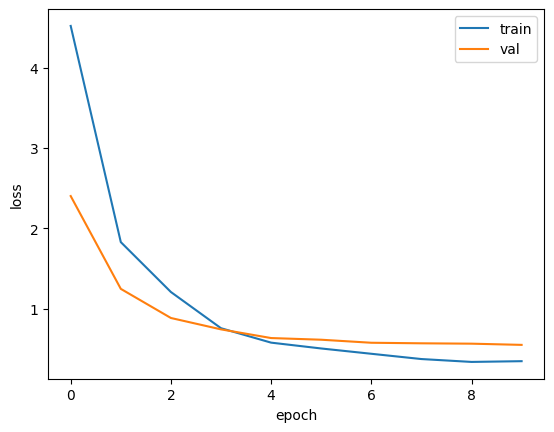

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

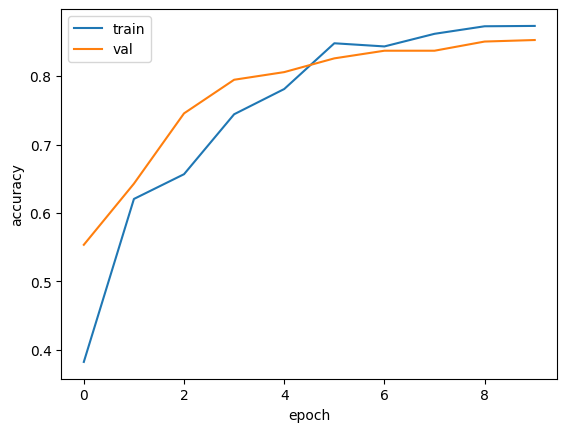

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [57]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = val_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical')

Found 500 images belonging to 3 classes.


In [58]:
model_final.evaluate(test_generator, steps=500 // BATCH_SIZE)

7/7 [==============================] - 294s 41s/step - loss: 0.5536 - acc: 0.8527


[0.5536455512046814, 0.8526785969734192]

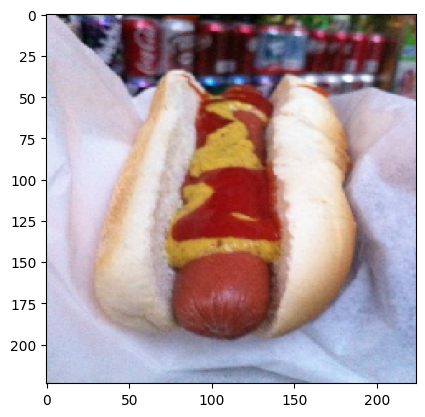

In [61]:
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

img_path = '/content/138933.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.imshow(img_array/255)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = expanded_img_array / 255

In [62]:
prediction = model_final.predict(preprocessed_img)
print(np.array(prediction[0]))

1/1 [==============================] - 1s 1s/step
[0.24134667 0.4651508  0.2935025 ]
